In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data = fetch_california_housing()

In [7]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


<Axes: >

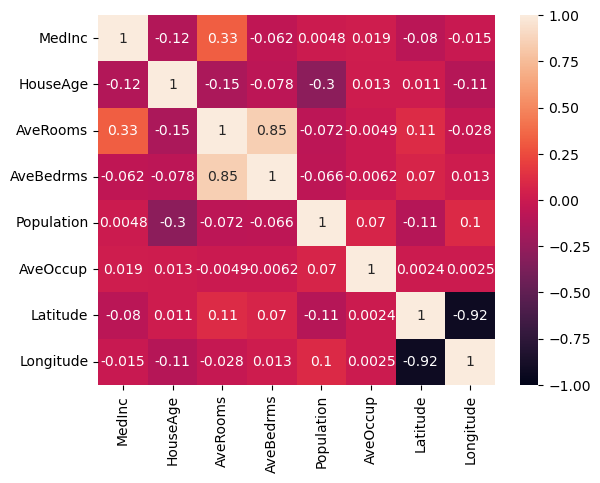

In [9]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

In [ ]:
# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [15]:
vif = pd.DataFrame()
vif['features'] = df.columns
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]


In [16]:
vif

,features,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [3]:
import pandas as pd 
from sentence_transformers import SentenceTransformer, util

In [4]:
# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')


In [6]:
# Dummy data
data = {
    "symptom": ["fever", "cough", "cold", "headache"],
    "treatment": ["paracetamol", "benadryl", "cetirizine", "aspirin"]
}

df = pd.DataFrame(data)

In [7]:
df

,symptom,treatment
0,fever,paracetamol
1,cough,benadryl
2,cold,cetirizine
3,headache,aspirin


In [9]:
symptoms_list = df["symptom"].tolist()
treatments_list = df["treatment"].tolist()
treatments_list

['paracetamol', 'benadryl', 'cetirizine', 'aspirin']

In [11]:
symptoms_embd = model.encode(symptoms_list, convert_to_tensor=True)
symptoms_embd

tensor([[-0.0246,  0.0534, -0.0067,  ..., -0.0050, -0.0392, -0.0171],
        [-0.0262, -0.0145,  0.0284,  ..., -0.0746,  0.0024,  0.0848],
        [-0.0882, -0.0091,  0.0045,  ..., -0.0311, -0.1325,  0.0509],
        [-0.1057,  0.0299, -0.0351,  ...,  0.0227,  0.0556, -0.0007]])

In [12]:
user_input = 'I have fever'

input_embd = model.encode(user_input, convert_to_tensor=True)
input_embd

tensor([-2.9065e-02, -1.9042e-02,  1.9611e-02,  2.0500e-03,  6.3598e-02,
        -4.6344e-02,  1.2837e-01,  5.5467e-02,  3.5433e-02, -1.1558e-03,
        -7.9112e-02, -8.6451e-02,  5.3608e-02,  5.7376e-02,  3.7506e-03,
        -3.8338e-02,  7.6866e-03, -7.8303e-02, -6.7276e-02,  4.3822e-03,
        -1.2857e-01,  1.4417e-02, -3.6934e-02,  4.1275e-02, -4.9622e-02,
         9.3380e-02,  9.4066e-03,  1.3005e-02, -3.4934e-02, -3.4493e-02,
        -2.3915e-02, -9.1421e-03, -1.1810e-02, -3.8724e-02,  5.8018e-03,
         1.8782e-03, -4.3666e-02, -6.4463e-02, -5.7776e-02,  5.0104e-02,
         5.5136e-03,  3.4788e-02,  5.0831e-02, -2.6928e-02,  8.5133e-02,
         1.1242e-02, -9.2772e-02,  8.1565e-02,  1.3067e-01, -1.7680e-02,
        -1.9574e-02,  1.8073e-02,  1.8447e-02,  3.6661e-02, -7.7478e-03,
         8.4841e-02, -7.9758e-02, -6.7665e-02, -4.6610e-02, -4.3075e-03,
        -8.2839e-02,  4.8044e-02, -1.2739e-03, -3.7214e-03, -2.2695e-03,
        -2.7205e-02, -4.5365e-02,  5.3499e-02, -2.7

In [22]:
scores  = util.pytorch_cos_sim(input_embd, symptoms_embd)[0]
scores 
top_idx = scores.argmax().item()
top_idx

# how the inputs are converted into the embeddings tell me into detail
print(f"matched symptom: {symptoms_list[top_idx]}")
print(f"recommended_treatment: {treatments_list[top_idx]}")

matched symptom: fever
recommended_treatment: paracetamol
